#   *"Dream Market"* 

Esta libreta se basa en un *dataset* perteneciente al sitio kaggle.com  creado mediante una tecnica de gathering llamada *Web Scraping*.El conjunto de datos contine informacion relacionada con la venta de drogas (Categoria:cocaina) de un sitio de la *dark web* llamado *Dream Market*, mediante el cual se espera comprender el comportamiento de las transacciones.

# Introducción

En la actualidad las compras por internet se han convertido en algo completamente normal para las personas, hasta el punto en el que el mercado se ha 
convertido en el mundo entero, existen compradores para cualquier producto. Claro que como para aquellos productos que no se pueden comprar en la 
tiendita de la esquina existe un mercado negro, también existe un mercado negro de compras en internet, que va desde comprar (inserte su pensamiento más
bizarro aquí) hasta (otro aun más bizarro aquí).

Dejando de lado sus pensamientos cochinos, en este documento hablaremos en concreto sobre el mundo de las drogas en internet ya que para algunas 
personas que no viven en México y que para su desgracia no tienen un "tiradero" en cada colonia de la ciudad abierto las 24 horas del día, los 365 días de la 
semana, existe aún una solución.


### Compras por internet.

Comprar drogas por internet es algo bastante tedioso si no sabes moverte en internet, pero si eres habil puede resultar sumamente sencillo y comodo. uno de los principales problemas (el numero 1 creo yo)es que puedes ir a la carcel.
El lado tedioso digamoslo asi es mantener el anonimato ya que es algo imprescindible en el mundo virtual para hacer este tipo de transacciones, tanto por el lado de los compradores como por el de los vendedores, pero una vez dentro ¿Que es lo que a uno le espera? ¿cuanto podre comprar? ¿con que voy a pagar para que no me rastreen? ¿cuanto me va a costar? y un monton de pregunas mas. Para comprender un poco mejor como funciona esto, usaremos el siguiente dataset: https://www.kaggle.com/everling/cocaine-listings que contiene informacion de aproximadamente 1400 productos, colectado mediante una tecnica de gathering llamada web-scraping, en el año 2017

<img src="img/dream.jpg" width="450" height="450" align="center"/>'


### Los datos del sitio 

In [6]:
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns; sns.set()
from IPython.display import Image
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import pandas
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium  
from folium import Marker
from folium import *
from folium.plugins import *

In [7]:
perico = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv
coke = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv

In [8]:
perico.head() #resumen de los datos contenidos en el dataset. 

Unnamed: 0                                      product_title  \
0          10              !!!!!INTRO OFFER!!!!! 1GR COCAINE 90%   
1          11              !!!!!INTRO OFFER!!!!! 2GR COCAINE 90%   
2          14  !!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...   
3          20  !1G! C O L O M B I A N C O C A I N E - 89% PURITY   
4          41      ** 1 Gram 87% Pure Uncut Colombian Cocaine **   

  ships_from_to  grams  quality  btc_price  cost_per_gram  cost_per_gram_pure  \
0      NL  → EU    1.0     90.0    0.02577        0.02577            0.028633   
1      NL  → EU    2.0     90.0    0.05150        0.02575            0.028611   
2      NL  → EU    0.5     89.0    0.01649        0.03298            0.037056   
3      FR  → EU    1.0     89.0    0.04120        0.04120            0.046292   
4      NL  → WW    1.0     87.0    0.03400        0.03400            0.039080   

   escrow                                       product_link  ... ships_to_SE  \
0       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
1       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
2       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
3       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
4       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   

  ships_from_SE  ships_to_CO  ships_from_CO ships_to_CN ships_from_CN  \
0         False        False          False       False         False   
1         False        False          False       False         False   
2         False        False          False       False         False   
3         False        False          False       False         False   
4         False        False          False       False         False   

   ships_to_PL  ships_from_PL  ships_to_GR  ships_from_GR  
0        False          False        False          False  
1        False          False        False          False  
2        False          False        False          False  
3        False          False        False          False  
4        False          False        False          False  

[5 rows x 64 columns]

In [9]:
perico.columns # mostrando todas las columnas de nuestro dataset sin limpiar

Index(['Unnamed: 0', 'product_title', 'ships_from_to', 'grams', 'quality',
       'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow',
       'product_link', 'vendor_link', 'vendor_name', 'successful_transactions',
       'rating', 'ships_from', 'ships_to', 'ships_to_US', 'ships_from_US',
       'ships_to_NL', 'ships_from_NL', 'ships_to_FR', 'ships_from_FR',
       'ships_to_GB', 'ships_from_GB', 'ships_to_CA', 'ships_from_CA',
       'ships_to_DE', 'ships_from_DE', 'ships_to_AU', 'ships_from_AU',
       'ships_to_EU', 'ships_from_EU', 'ships_to_ES', 'ships_from_ES',
       'ships_to_N. America', 'ships_from_N. America', 'ships_to_BE',
       'ships_from_BE', 'ships_to_WW', 'ships_from_WW', 'ships_to_SI',
       'ships_from_SI', 'ships_to_IT', 'ships_from_IT', 'ships_to_DK',
       'ships_from_DK', 'ships_to_S. America', 'ships_from_S. America',
       'ships_to_CH', 'ships_from_CH', 'ships_to_BR', 'ships_from_BR',
       'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE', 'ships_f

In [10]:
print ("Total de columnas:",len (perico.columns))

Total de columnas: 64


Se tiene un conjunto de datos con 64 columnas, como se puede observar en el resumen es dificil comprender de que se tratan los datos, podemos ver algunas variables con nombres que describen vagamente el contenido de sus columnas pero es necesario desglozarlas para saber que tecnicas se pueden aplicar de tal manera que sea claro para cualquier persona

### Descripción de las variables 
- Imaginense que son ustedes los que estan quieren comprar cocaina por internet, ¿que criterio utilizarian 
para realizar su compra?.<br>
#### 'product_title'
contiene una breve descripción del producto que el usuario vende
#### 'ships_from_to'
(de donde viene y a donde se envia)
#### 'grams'
(la cantidad de gramos que un vendedor manda)
algunos vendedores se anuncian como "0.5G COCAINE 89% "  y otros "10 Gram 87% Pure Uncut Colombian Cocaine" 
#### 'quality'
La calidad de la cocaina que venden, como ejemplo, la denominada "Yen” es más pura (roza el 98%) y más blanca, escamosa y brillante. Ahora bien, existen otros tipos de cocaína en polvo con menos pureza, en la que su presentación es más polvorienta y con menor brillo. Esto ocurre porque para su comercialización se añaden una serie de sustancias químicas que pueden ser altamente tóxicas. Cuantas menos sustancias incorpore más pura es la coca y es considerada de mayor calidad.
#### 'btc_price'
el precio en bitcoins del producto que venden
#### 'cost_per_gram'
costo por gramo de coca no pura 
#### 'cost_per_gram_pure'
costo por gramo de coca pura
#### 'product_link'
el enlace hacia el producto
#### 'vendor_link'
enlace del vendedor 
#### 'vendor_name'
nombre del vendedor
#### 'successful_transactions'
numero de transacciones exitosas
#### 'rating'
rating del vendedor 
#### 'ships'
El resto de las variables que aparecen en el dataset estan relacionadas con informacion geografica que indica especificamente desde donde se esta enviando el producto y hacia a donde se envia, parecen reduntantes por la forma en la que se creo el dataset pero aun asi se puede trabajar con ellas

### ¿Qué quieren decir estos datos? 
pues es informacion representada de una manera en la que la gente que trabajamos en esto sin que nos paguen tenemos que encontrarle algun sentido sin que necesariamente lo tenga y mostrarlo de alguna manera que haga que si tenga .

La forma mas sencilla que se me ocurre para explicar los datos es una representacion visual de la información.


In [11]:
dat = perico.loc[:,["ships_from","ships_to","cost_per_gram","cost_per_gram_pure"]].copy()
lat=pd.Series([])
long=pd.Series([])
amount=pd.Series([])

In [12]:
for i in range(len(dat)): 
    
    if dat["ships_from"][i] == "NL": 
        lat[i]="52.370216"
        long[i]= "4.895168"
        amount[i]="496"
        
    elif dat["ships_from"][i] == "DE": 
        lat[i]="51.1656914"
        long[i]= "10.4515257"
        amount[i]="376"
        
    elif dat["ships_from"][i] == "AU": 
        lat[i]="-25.2743988"
        long[i]= "133.7751312"
        amount[i]="40"
        
    elif dat["ships_from"][i] == "FR": 
        lat[i]="46.2276382"
        long[i]= "2.2137489"
        amount[i]="70"
        
    elif dat["ships_from"][i] == "BR": 
        lat[i]="-23.5475006"
        long[i]= "-46.6361084"
        amount[i]="5"
        
    elif dat["ships_from"][i] == "US": 
        lat[i]="37.0902405"
        long[i]= " -95.7128906"
        amount[i]="112"
        
    elif dat["ships_from"][i] == "GB": 
        lat[i]="55.3780518"
        long[i]= "-3.4359729"
        amount[i]="251"
        
    elif dat["ships_from"][i] == "BE": 
        lat[i]="50.5038872"
        long[i]= "4.4699359"
        amount[i]="25"
        
    elif dat["ships_from"][i] == "CA": 
        lat[i]="56.13036732"
        long[i]= "-106.3467712"
        amount[i]="19"
        
    elif dat["ships_from"][i] == "ES": 
        lat[i]="40.4636688"
        long[i]= "-3.7492199"
        amount[i]="11"
        
    elif dat["ships_from"][i] == "IT": 
        lat[i]="42.8333000"
        long[i]= "12.8333000"
        amount[i]="7"
        
    elif dat["ships_from"][i] == "SE": 
        lat[i]="60.1281624"
        long[i]= "18.6435013"
        amount[i]="1"
        
    elif dat["ships_from"][i] == "CN": 
        lat[i]="35.86166"
        long[i]= "104.1953964"
        amount[i]="1"
    
    elif dat["ships_from"][i] == "CH": 
        lat[i]="46.8181877"
        long[i]= "8.2275124"
        amount[i]="1"
    
    elif dat["ships_from"][i] == "CZ": 
        lat[i]="49.8174934"
        long[i]= "15.4729624"
        amount[i]="1"
    
dat.insert(2,"lat",lat)
dat.insert(2,"long",long)
dat.insert(2,"amount",amount)

In [13]:
latitude=pd.to_numeric (lat)
longitude=pd.to_numeric (long)
cantidad=pd.to_numeric(amount)
dat.insert(2,"latitude",latitude)
dat.insert(2,"longitude",longitude)
dat.insert(2,"cantidad",cantidad)

In [14]:
gdf = gpd.GeoDataFrame(
    dat, geometry=gpd.points_from_xy(dat.longitude,dat.latitude))

In [15]:
data2 = dat.loc[:, ["ships_from", "ships_to", "geometry","long", "lat","cantidad","cost_per_gram","cost_per_gram_pure"]].copy()
data2.dropna(inplace=True)

### ¿Quién vende mas cocaina en la dark web?

In [16]:
hmap=folium.Map(location=[40, 5], tiles='Stamen Terrain', zoom_start=2)
folium.CircleMarker(
    location=[52.37022,4.89517],
    radius=18,
    popup='Países Bajos:496 envios',
    color='#3186cc',
    fill=True,
).add_to(hmap)
folium.CircleMarker(
    location=[51.1656914,10.45153],
    radius=14,
    popup='Alemania:376 envios',
    color='#3186cc',
    fill=True,
).add_to(hmap)

folium.CircleMarker(
    location=[55.37805,-3.43597],
    radius=10,
    popup='Gran Bretaña:251 envios',
    color='#3186cc',
    fill=True,
).add_to(hmap)

folium.CircleMarker(
    location=[37.09024,-95.71289],
    radius=10,
    popup='Estados Unidos:112 envios',
    line_color='#3186cc',
    Color='#3186cc',
   
).add_to(hmap)
hm_wide=HeatMap(list(zip(data2.lat.values,data2.long.values, data2.cantidad.values)),
                min_opacity=0.7,
                radius=17, blur=18,                                              
               )
hmap.add_child(hm_wide)

<img src="img/calor.png" width="850" height="850" align="center"/>'


In [17]:
value_counts=dat.ships_from.value_counts()
value_counts.rename_axis('países').reset_index(name='ventas')
df_val_counts = pd.DataFrame(value_counts) 
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['ships_from', 'cantidad_envios']


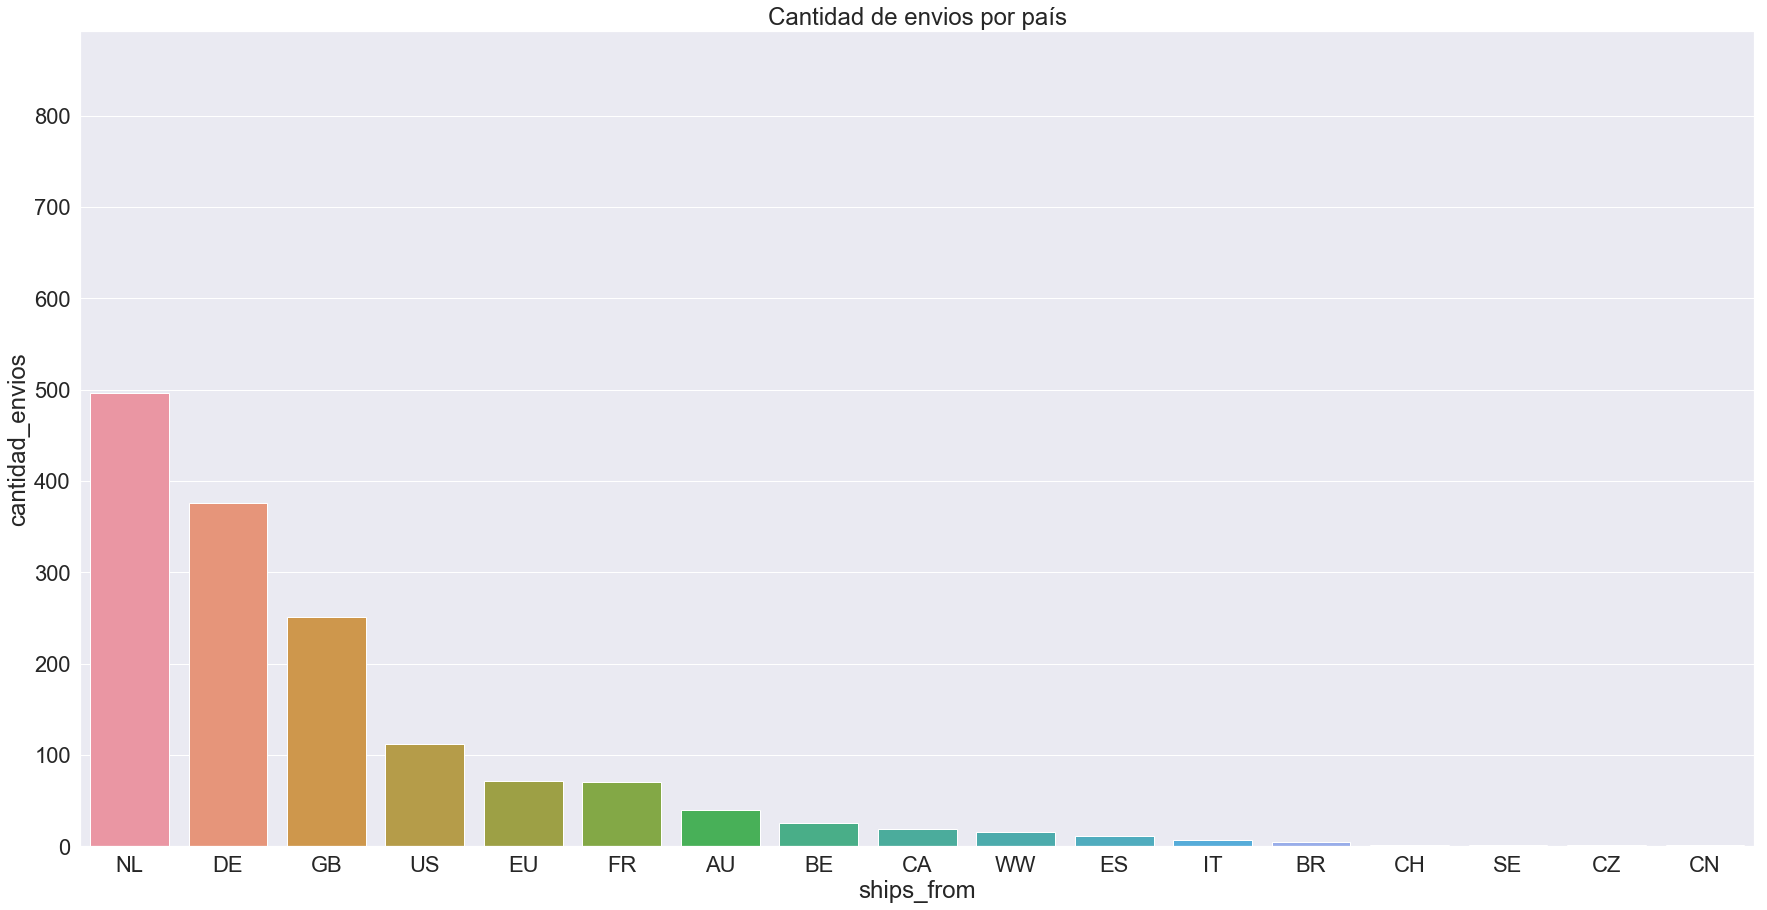

In [18]:
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
plt.margins(0.8)
plt.title('Cantidad de envios por país')
sns.barplot (x=df_value_counts['ships_from'], y=df_value_counts['cantidad_envios']) 


comportamiento en el mundo real segun  United Nations Office on Drugs and Crime (UNODC). tomado del año 2013- 2017
https://wdr.unodc.org/wdr2019/prelaunch/WDR19_Booklet_1_EXECUTIVE_SUMMARY.pdf

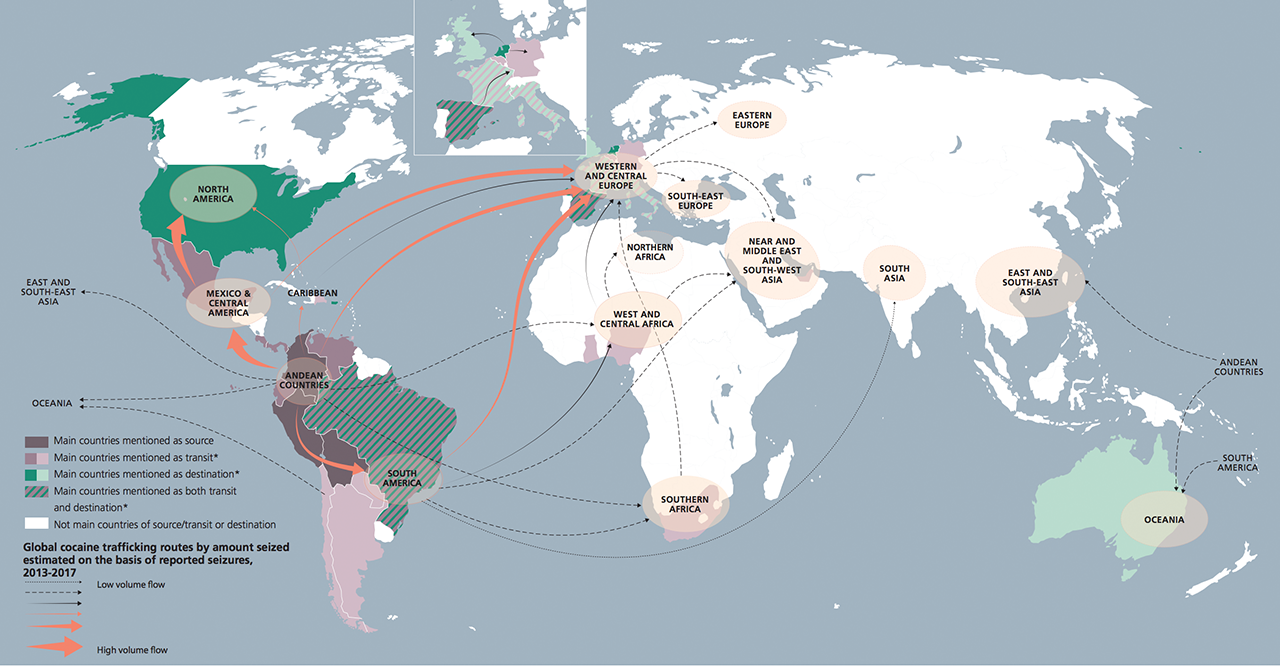

In [19]:
from IPython.display import Image 
Image (filename="img/envios_coc.png", width=1000, height=1000)

por que no salen los principales productores en el mapa interactivo como colombia venezuela o mexico 

lo grandes productores se preocupan por vender grandes cantidades de droga y la venta en linea esta mas que nada orientada
en venta por gramos, estamos hablando de altos volumentes de producto que se mueve por una infraestructura formada desde el cartel
de medellin por la red es un envio mas personalizado a una persona en concreto resulta sencillo rastrearte



### ¿Cuanto cuesta? ¿Donde cuesta mas cara? ¿que factores influyen en el precioso?

In [20]:
precioso=data2.groupby('ships_from', as_index=False)['cost_per_gram'].mean()
latitudes=[-25.2743988,50.5038872,-23.5475006,56.13036732,46.8181877,35.86166,49.8174934,51.1656914,40.4636688,
          46.2276382,55.3780518,52.370216,60.1281624,37.0902405]

longitudes=[133.7751312,4.4699359,-46.6361084,-106.3467712,8.2275124,104.1953964,15.4729624,10.4515257 ,-3.7492199,
           2.2137489,-3.4359729,4.895168,18.6435013,-95.7128906]

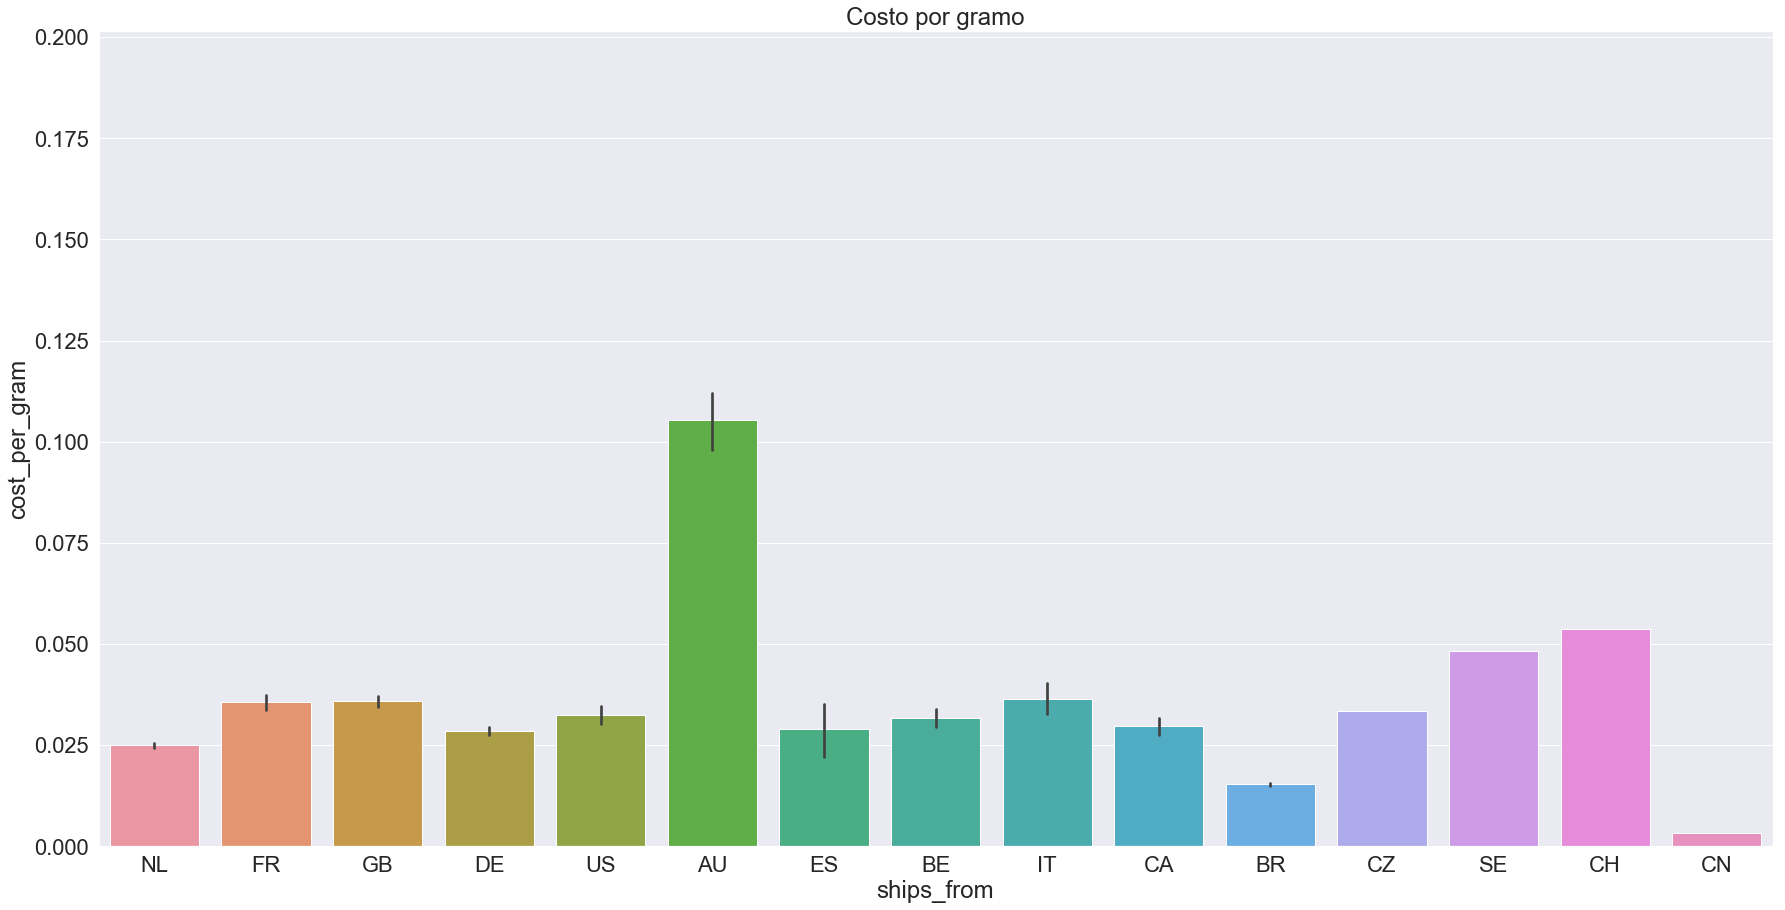

In [21]:
#sns.set(font_scale=2)
plt.figure(figsize=(30,15))
plt.margins(0.8)
plt.title('Costo por gramo')
sns.barplot (x=data2['ships_from'], y=data2['cost_per_gram']) 


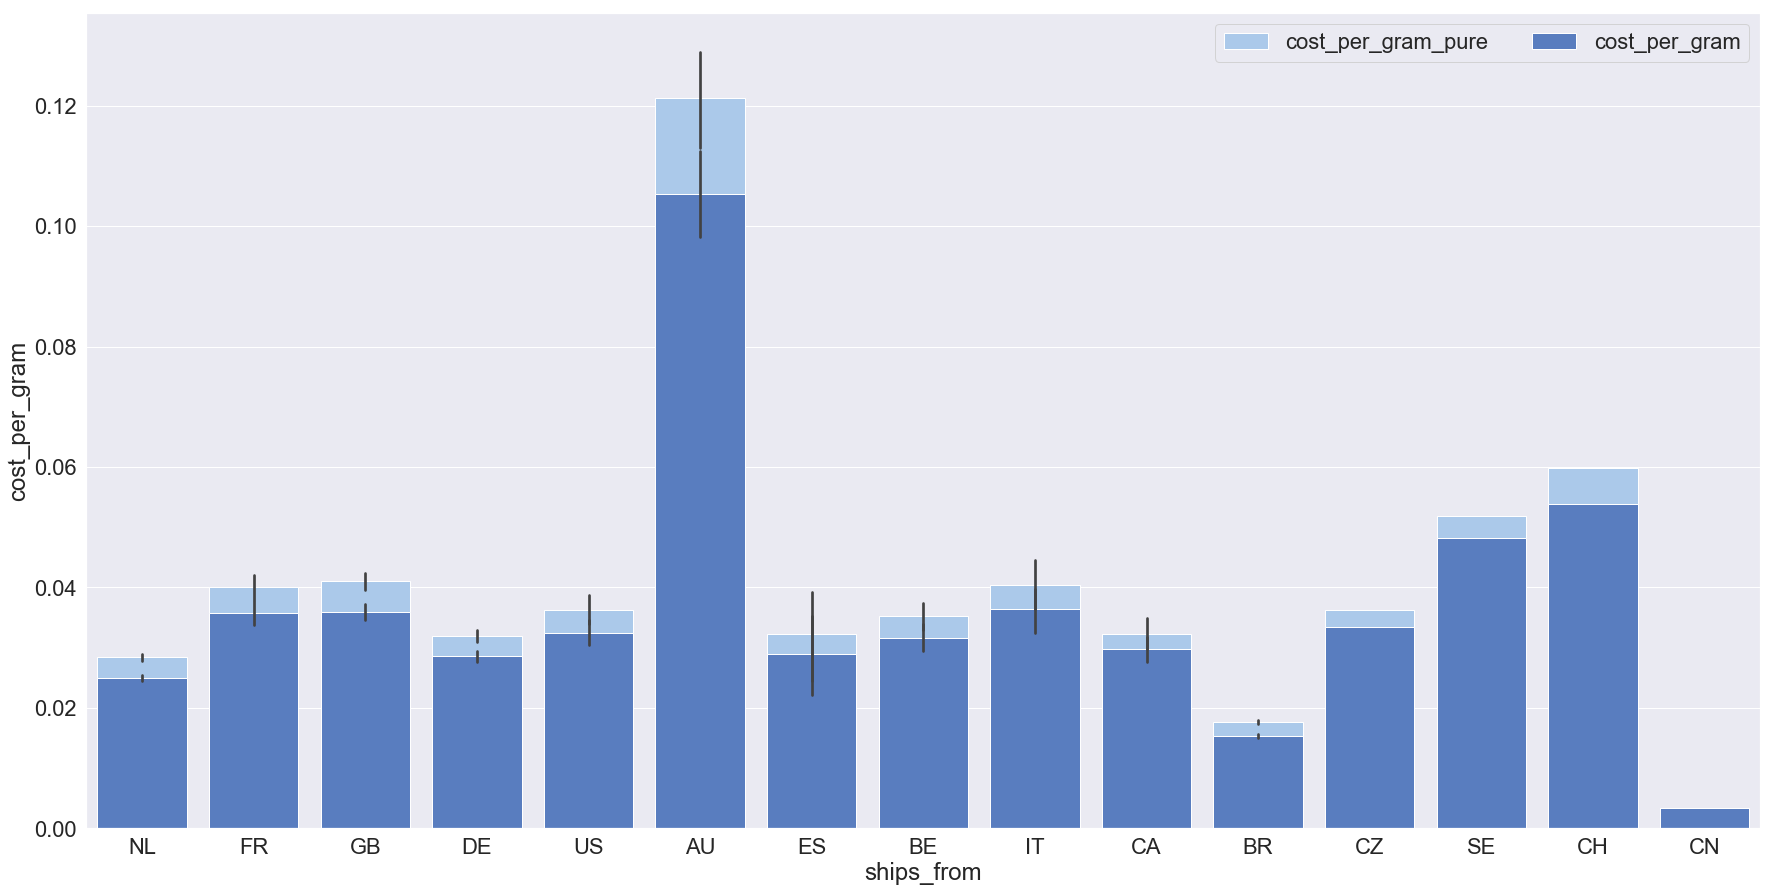

In [22]:
sns.set(font_scale=2)

f, ax = plt.subplots(figsize = (30,15))
sns.set_color_codes('pastel')
sns.barplot(x = 'ships_from', y = 'cost_per_gram_pure', data = data2,
            label = 'cost_per_gram_pure', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'ships_from', y = 'cost_per_gram', data = data2,
            label = 'cost_per_gram', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
plt.show()

In [23]:
precioso["ships_from"].replace({"IT":"ITA","AU": "AUS", "BE": "BEL","BR":"BRA","CA":"CAN","CH":"CHE","CN":"CHN","CZ":"CZE","DE":"DEU","ES":"ESP","FR":"FRA","GB":"GBR","NL":"NLD","SE":"SWE","US":"USA"}, inplace=True)

### Precio de la cocaina alrededor del mundo (Dream Market)

In [24]:
import plotly.express as px
df = precioso
fig = px.choropleth(df, locations="ships_from",
                    color="cost_per_gram", 
                    hover_name="ships_from",
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(
    title_text='2017 Costo por gramo (Dream market)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://docs.google.com/spreadsheets/d/14GbheDtl0a1uXZ4SJiy3rH93t4RUTv5IVhxSMHbJ7yU/edit#gid=275616560">\
            Dream market</a>',
        showarrow = False
    )]
),
fig.show()

<img src="img/calor2.png" width="850" height="850" align="center"/>'


### precio de la cocaina deacuerdo con los datos de  las naciones unidas 

https://dataunodc.un.org/drugs/prices-2017

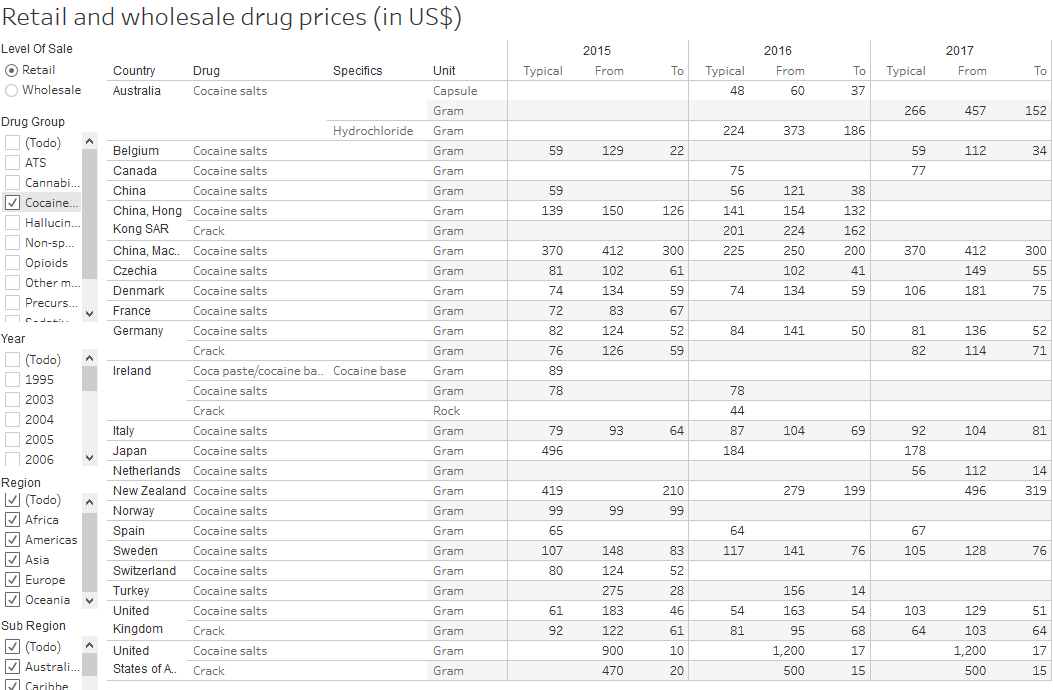

In [25]:
Image (filename="img/precios.png", width=1000, height=1000)

en colombia el precio de la coca por gramo es de aproximadamente 1.5 euros = 1.66 us = 31.34 pesos
la cocaina para ser exportada tiene que irse a venezuela, solo por cruzar la frontera el precio ya en venezuela sube a 6 euros 125.38 pesos mexicanos una vez que cruza el atlantico el precio de la coca es de 40 euros = 835.92 pesos.
la mayoria de las personas que son distribuidoras obtienen sus drogas de barcelona y fuera de barcelona sube a 80euros e gramo 

llega pura del laboratorio de colombia no se toca para nada 

el precio de un kg en barcelona es de 731,641 pesos 35 mil euros el mejor precio de coca pura
si compran uno cortan la mitad de la droga y obtienen otro kilo si son muy cochis un poco mas conservador seria .750 kg y no baja tanto la calidad, lo cortan con aspirina en polvo y guardan medio para ellos o para otro mas

fuera de barcelona en francia el precio puede ser de 80 euros el gramo que viene siendo 1673 pesos y hasta mas


el precio en venezuela segun el documental de the cocaine road el gramo en venezuela es de aprox 6 euros que en pesos 
se traduce como 125 pesos el gramo de cocaina de la mas alta calidad solo por cruzar el atlantico una vez en barcelona 
que es el puerto mas popular donde se recibe el producto se convierte en 40 euros 

ahora 

### analisis exploratorio

 hasta este momento se ha observado el comportamiento de los datos a grandes rasgos, que en verdad resuelve bastantes dudas 
se ha podido contestar bastantes preguntas pero que hay mas alla de la informacion que se muestra en las imagenes con las preguntas que contestamos? como saber como se comportan los vendedores? 

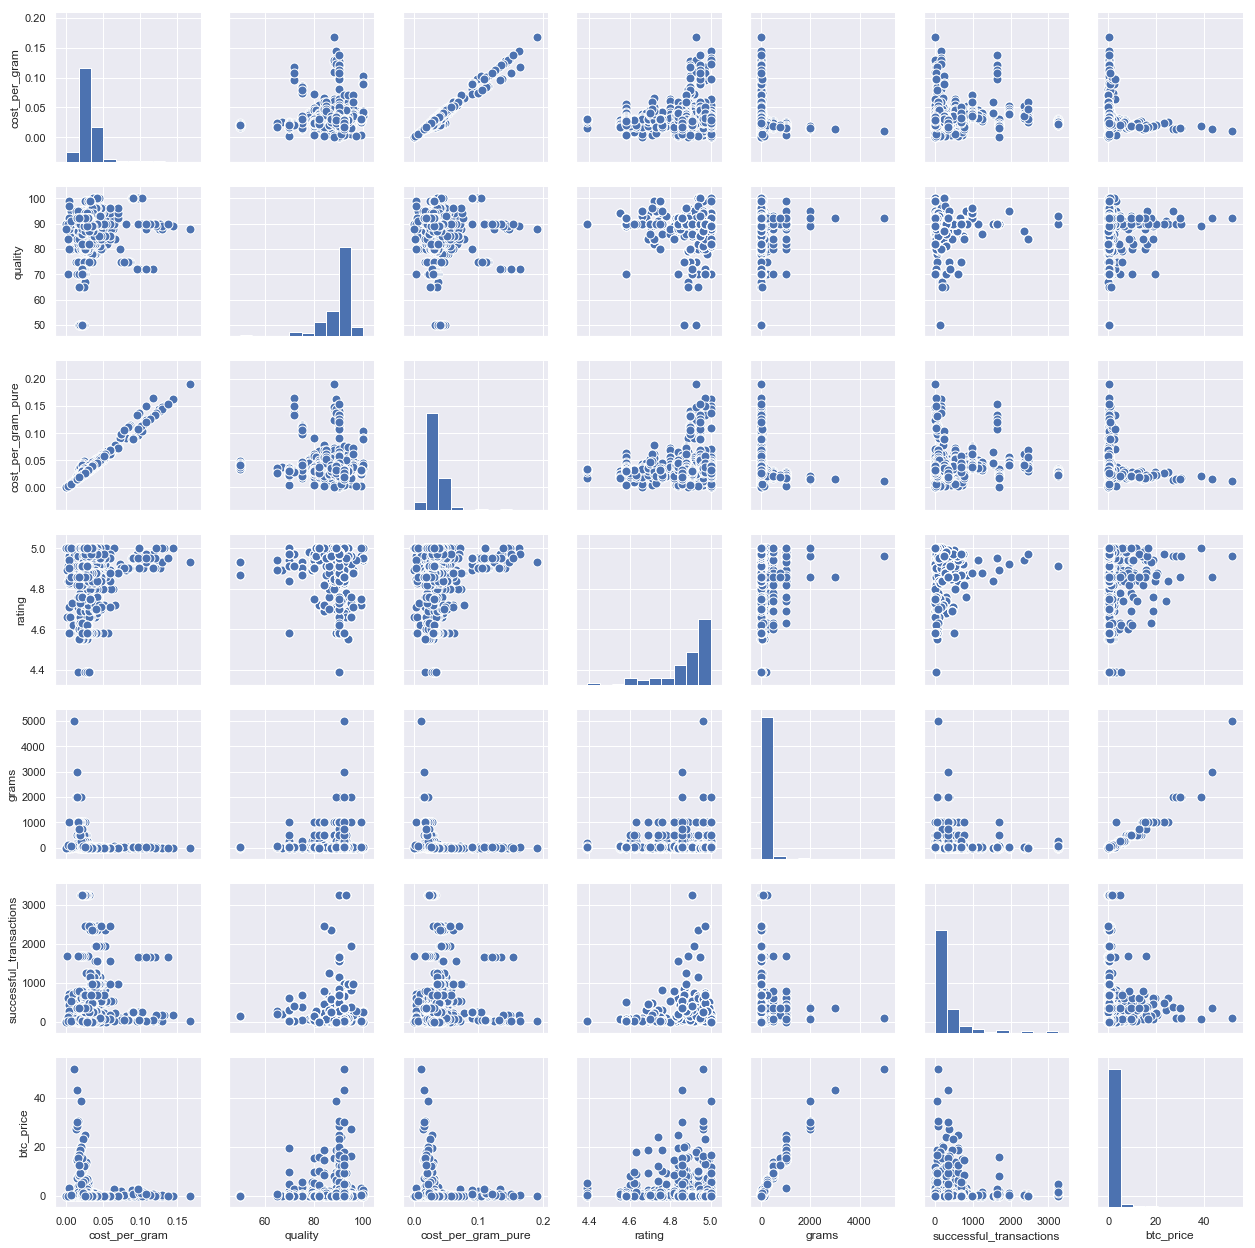

In [26]:
sns.set(font_scale=1)
g = sns.PairGrid(perico, vars=["cost_per_gram", "quality","cost_per_gram_pure", "rating","grams","successful_transactions","btc_price"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=80)

In [27]:
datoscoke = perico.loc[:, ["cost_per_gram","ships_from","cost_per_gram_pure","quality","rating","grams","vendor_name","successful_transactions","escrow","btc_price"]].copy()
datoscoke=datoscoke.copy()

In [28]:
#datoscoke.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


una vez que se ha pasado todo el tormento de la transportacion y ya la droga se encuentra en sus centros de distribucion 
que es lo que afecta el precio para los compradores directamente en la dark web?


In [29]:
datoscoke["ships_from"].replace({"NL": 1,"FR": 2, "GB": 3, "DE": 4, "US":5,"EU":6,"AU":7,"BE":8,"CA":9,"WW":10,"ES":11, "IT":12,"BR":13,
                                "CN":14,"CZ":15,"CH":16,"SE":17}, inplace=True)


In [30]:
datoscoke.corr()

cost_per_gram  ships_from  cost_per_gram_pure  \
cost_per_gram                 1.000000    0.248025            0.985784   
ships_from                    0.248025    1.000000            0.236538   
cost_per_gram_pure            0.985784    0.236538            1.000000   
quality                       0.082540    0.110310           -0.064907   
rating                        0.121977    0.167964            0.126917   
grams                        -0.178628   -0.017938           -0.178273   
successful_transactions       0.063822   -0.047176            0.051564   
escrow                       -0.170052   -0.100459           -0.170629   
btc_price                    -0.171318   -0.044518           -0.170636   

                          quality    rating     grams  \
cost_per_gram            0.082540  0.121977 -0.178628   
ships_from               0.110310  0.167964 -0.017938   
cost_per_gram_pure      -0.064907  0.126917 -0.178273   
quality                  1.000000 -0.055191  0.030695   
rating                  -0.055191  1.000000  0.009282   
grams                    0.030695  0.009282  1.000000   
successful_transactions  0.053754  0.062433 -0.012006   
escrow                   0.031008 -0.037400 -0.148276   
btc_price                0.027096  0.000539  0.960451   

                         successful_transactions    escrow  btc_price  
cost_per_gram                           0.063822 -0.170052  -0.171318  
ships_from                             -0.047176 -0.100459  -0.044518  
cost_per_gram_pure                      0.051564 -0.170629  -0.170636  
quality                                 0.053754  0.031008   0.027096  
rating                                  0.062433 -0.037400   0.000539  
grams                                  -0.012006 -0.148276   0.960451  
successful_transactions                 1.000000 -0.029527  -0.008213  
escrow                                 -0.029527  1.000000  -0.159067  
btc_price                              -0.008213 -0.159067   1.000000

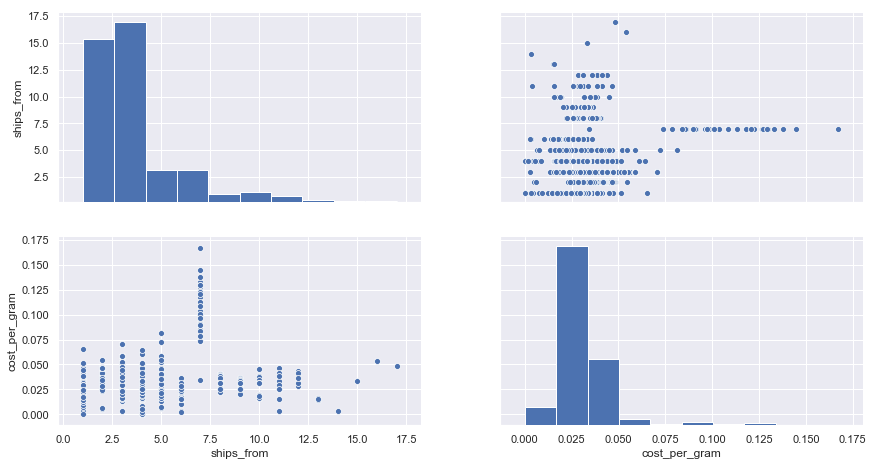

In [31]:
g=sns.pairplot(datoscoke, vars=["ships_from", "cost_per_gram"])
g.fig.set_size_inches(14,7)

In [32]:
lm = smf.ols ( formula = "cost_per_gram ~ cost_per_gram_pure", data = datoscoke).fit()


In [33]:
lm.params

Intercept             0.000741
cost_per_gram_pure    0.862110
dtype: float64

In [34]:
lm.pvalues

Intercept             9.160752e-07
cost_per_gram_pure    0.000000e+00
dtype: float64

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 5.170e+04
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:40:15   Log-Likelihood:                 6763.9
No. Observations:                1504   AIC:                        -1.352e+04
Df Residuals:                    1502   BIC:                        -1.351e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0007      0.000      4.929      0.000       0.000       0.001
cost_per_gram_pure     0.8621      0.004    227.384      0.000       0.855       0.870
==============================================================================
Omnibus:                     1051.362   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29489.955
Skew:                          -2.876   Prob(JB):                         0.00
Kurtosis:                      23.916   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
coca_pred=lm.predict(pd.DataFrame(datoscoke["cost_per_gram_pure"]))


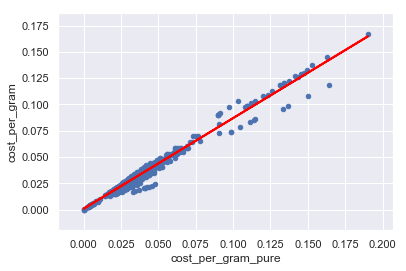

In [37]:
datoscoke.plot(kind="scatter",x="cost_per_gram_pure", y="cost_per_gram")
plt.plot(pd.DataFrame(datoscoke["cost_per_gram_pure"]),coca_pred, c="red", linewidth=2)

In [38]:
lm3 = smf.ols(formula = "cost_per_gram ~  grams+ships_from + quality + cost_per_gram_pure + rating", data=datoscoke).fit()

In [39]:
lm3.params

Intercept            -3.690500e-02
grams                -3.996536e-07
ships_from           -3.048037e-05
quality               3.891745e-04
cost_per_gram_pure    8.699980e-01
rating                6.227600e-04
dtype: float64

In [40]:
lm3.pvalues

Intercept             1.812895e-113
grams                  5.396242e-03
ships_from             4.083879e-02
quality                0.000000e+00
cost_per_gram_pure     0.000000e+00
rating                 2.840579e-02
dtype: float64

In [41]:
lm3.rsquared

0.9933983538512833

In [42]:
coca_preds3=lm3.predict(datoscoke[["grams","ships_from","quality","cost_per_gram_pure","rating"]])

In [43]:
coca_preds3.head()

0    0.025884
1    0.025864
2    0.033016
3    0.041058
4    0.033899
dtype: float64

In [44]:
SSD= sum((datoscoke["cost_per_gram"]-coca_preds3)**2)

In [45]:
RSE = np.sqrt(SSD/(len(datoscoke)-2-1))

In [46]:
RSE

0.0013047089922037555

In [47]:
cpgmean = np.mean(datoscoke["cost_per_gram"])
cpgmean

0.031017177200992643

In [48]:
error2=RSE/cpgmean

In [49]:
error2

0.04206407900206989

In [50]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.508e+04
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:40:16   Log-Likelihood:                 7856.6
No. Observations:                1504   AIC:                        -1.570e+04
Df Residuals:                    1498   BIC:                        -1.567e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0369      0.001    -24.725      0.000      -0.040      -0.034
grams              -3.997e-07   1.43e-07     -2.786      0.005   -6.81e-07   -1.18e-07
ships_from         -3.048e-05   1.49e-05     -2.047      0.041   -5.97e-05   -1.27e-06
quality                0.0004   5.59e-06     69.612      0.000       0.000       0.000
cost_per_gram_pure     0.8700      0.002    449.376      0.000       0.866       0.874
rating                 0.0006      0.000      2.194      0.028    6.59e-05       0.001
==============================================================================
Omnibus:                     1625.834   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336292.680
Skew:                          -4.868   Prob(JB):                         0.00
Kurtosis:                      75.606   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([  1.,   9.,  71., 197., 379., 410., 288., 115.,  31.,   3.]),
 array([-3.74047307, -3.01954923, -2.29862539, -1.57770154, -0.8567777 ,
        -0.13585386,  0.58506998,  1.30599382,  2.02691766,  2.74784151,
         3.46876535]),
 <a list of 10 Patch objects>)

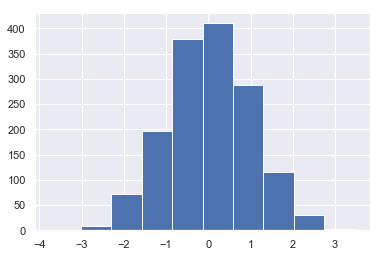

In [51]:
a = np.random.randn(len(datoscoke))#distribución uniforme con el mismo numero de elementos de mi dataset
plt.hist(a)

In [52]:
feature_cols = ["grams","ships_from","quality","cost_per_gram_pure","rating"]
from sklearn.linear_model import LinearRegression 

In [53]:
X=datoscoke[feature_cols]
Y=datoscoke["cost_per_gram"]

In [54]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
print (lm.intercept_)
print (lm.coef_)

-0.03690500395712479
[-3.99653583e-07 -3.04803716e-05  3.89174454e-04  8.69997971e-01
  6.22759958e-04]


In [56]:
list (zip(feature_cols, lm.coef_))

[('grams', -3.9965358253888345e-07),
 ('ships_from', -3.048037161706077e-05),
 ('quality', 0.0003891744539981762),
 ('cost_per_gram_pure', 0.869997970943568),
 ('rating', 0.0006227599577469941)]

In [57]:
lm.score(X,Y)#rcuadrado

0.9933983538512832

In [58]:
#modelo
datoscoke["pred"]=lm.predict(pd.DataFrame(datoscoke[feature_cols]))
#datoscoke["pred"] = -0.03690500395712479 + datoscoke['grams'] * -3.9965358253888345e-07 + datoscoke['ships_from']*-3.048037161706077e-05 +datoscoke['quality']*0.0003891744539981762 + datoscoke['cost_per_gram_pure']*0.869997970943568 + datoscoke['rating'] * 0.0006227599577469941

In [59]:
datoscoke.head(10)

cost_per_gram  ships_from  cost_per_gram_pure  quality  rating  grams  \
0       0.025770           1            0.028633     90.0    4.63    1.0   
1       0.025750           1            0.028611     90.0    4.63    2.0   
2       0.032980           1            0.037056     89.0    4.94    0.5   
3       0.041200           2            0.046292     89.0    5.00    1.0   
4       0.034000           1            0.039080     87.0    4.78    1.0   
5       0.027050           1            0.031092     87.0    4.78   10.0   
6       0.031150           1            0.035805     87.0    4.78    2.0   
7       0.029667           1            0.034100     87.0    4.78    3.0   
8       0.028340           1            0.032575     87.0    4.78    5.0   
9       0.023460           3            0.031280     75.0    4.93    0.5   

         vendor_name  successful_transactions  escrow  btc_price      pred  
0       Mister-Molly                       90       1    0.02577  0.025884  
1       Mister-Molly                       90       1    0.05150  0.025864  
2      0ldamsterdamm                      620       1    0.01649  0.033016  
3     lhomme-masquer                       15       1    0.04120  0.041058  
4  SMOOTHCRIMINAL007                       28       1    0.03400  0.033899  
5  SMOOTHCRIMINAL007                       28       0    0.27050  0.026945  
6  SMOOTHCRIMINAL007                       28       0    0.06230  0.031049  
7  SMOOTHCRIMINAL007                       28       0    0.08900  0.029565  
8  SMOOTHCRIMINAL007                       28       0    0.14170  0.028237  
9          cocaineuk                      380       1    0.01173  0.022475

### validación

(array([ 12.,  24.,  97., 236., 366., 357., 239., 128.,  38.,   7.]),
 array([-3.13171652, -2.50645108, -1.88118564, -1.25592019, -0.63065475,
        -0.00538931,  0.61987613,  1.24514158,  1.87040702,  2.49567246,
         3.1209379 ]),
 <a list of 10 Patch objects>)

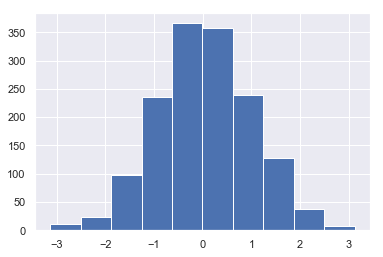

In [60]:
a = np.random.randn(len(datoscoke))#distribución uniforme con el mismo numero de elementos de mi dataset
plt.hist(a)

In [61]:
check = (a<0.8)
training =datoscoke[check]#conjunto de entrenamiento 80%
testing =datoscoke[~check]#conjunto de testing 20%

In [62]:
lm4= smf.ols(formula ="cost_per_gram ~ grams+ships_from+btc_price+quality+cost_per_gram_pure", data=training).fit()

In [63]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.535e+04
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:40:17   Log-Likelihood:                 6031.7
No. Observations:                1166   AIC:                        -1.205e+04
Df Residuals:                    1160   BIC:                        -1.202e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0342      0.001    -58.728      0.000      -0.035      -0.033
grams              -5.915e-07   5.61e-07     -1.054      0.292   -1.69e-06     5.1e-07
ships_from         -3.308e-05   1.75e-05     -1.885      0.060   -6.75e-05    1.35e-06
btc_price           1.535e-05    3.7e-05      0.415      0.678   -5.73e-05     8.8e-05
quality                0.0004   6.51e-06     60.309      0.000       0.000       0.000
cost_per_gram_pure     0.8711      0.002    399.028      0.000       0.867       0.875
==============================================================================
Omnibus:                     1233.333   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220958.890
Skew:                          -4.655   Prob(JB):                         0.00
Kurtosis:                      69.793   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
len(datoscoke)

1504

In [65]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(datoscoke, test_size=0.2)


In [66]:
len(train)

1203

In [67]:
lm5= smf.ols(formula ="cost_per_gram ~ grams+ships_from+btc_price+quality+cost_per_gram_pure", data=train).fit()

In [68]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.301e+04
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:40:17   Log-Likelihood:                 6222.0
No. Observations:                1203   AIC:                        -1.243e+04
Df Residuals:                    1197   BIC:                        -1.240e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0338      0.001    -58.122      0.000      -0.035      -0.033
grams              -2.726e-07   5.64e-07     -0.484      0.629   -1.38e-06    8.33e-07
ships_from         -2.117e-05   1.71e-05     -1.238      0.216   -5.47e-05    1.24e-05
btc_price          -1.653e-05   3.73e-05     -0.443      0.658   -8.97e-05    5.67e-05
quality                0.0004   6.49e-06     60.143      0.000       0.000       0.000
cost_per_gram_pure     0.8653      0.002    386.294      0.000       0.861       0.870
==============================================================================
Omnibus:                     1230.968   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203979.628
Skew:                          -4.420   Prob(JB):                         0.00
Kurtosis:                      66.177   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### arbol de regresión

In [69]:
#datoscoke

In [70]:
colnames=datoscoke.columns.values.tolist()
predictors=colnames[2:5]
target=colnames[0]
X1=datoscoke[predictors]
Y1=datoscoke[target]

In [71]:
predictors

['cost_per_gram_pure', 'quality', 'rating']

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
regtree= DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [74]:
regtree.fit(X1,Y1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [75]:
predics=regtree.predict(datoscoke[predictors])

In [76]:
datoscoke["predics"]=predics

In [77]:
resultado = datoscoke[["predics","cost_per_gram"]]

In [78]:
resultado.head(10)

predics  cost_per_gram
0  0.025672       0.025770
1  0.025672       0.025750
2  0.033109       0.032980
3  0.041413       0.041200
4  0.034863       0.034000
5  0.026905       0.027050
6  0.031465       0.031150
7  0.030601       0.029667
8  0.027617       0.028340
9  0.022131       0.023460

In [79]:
#pip install graphviz

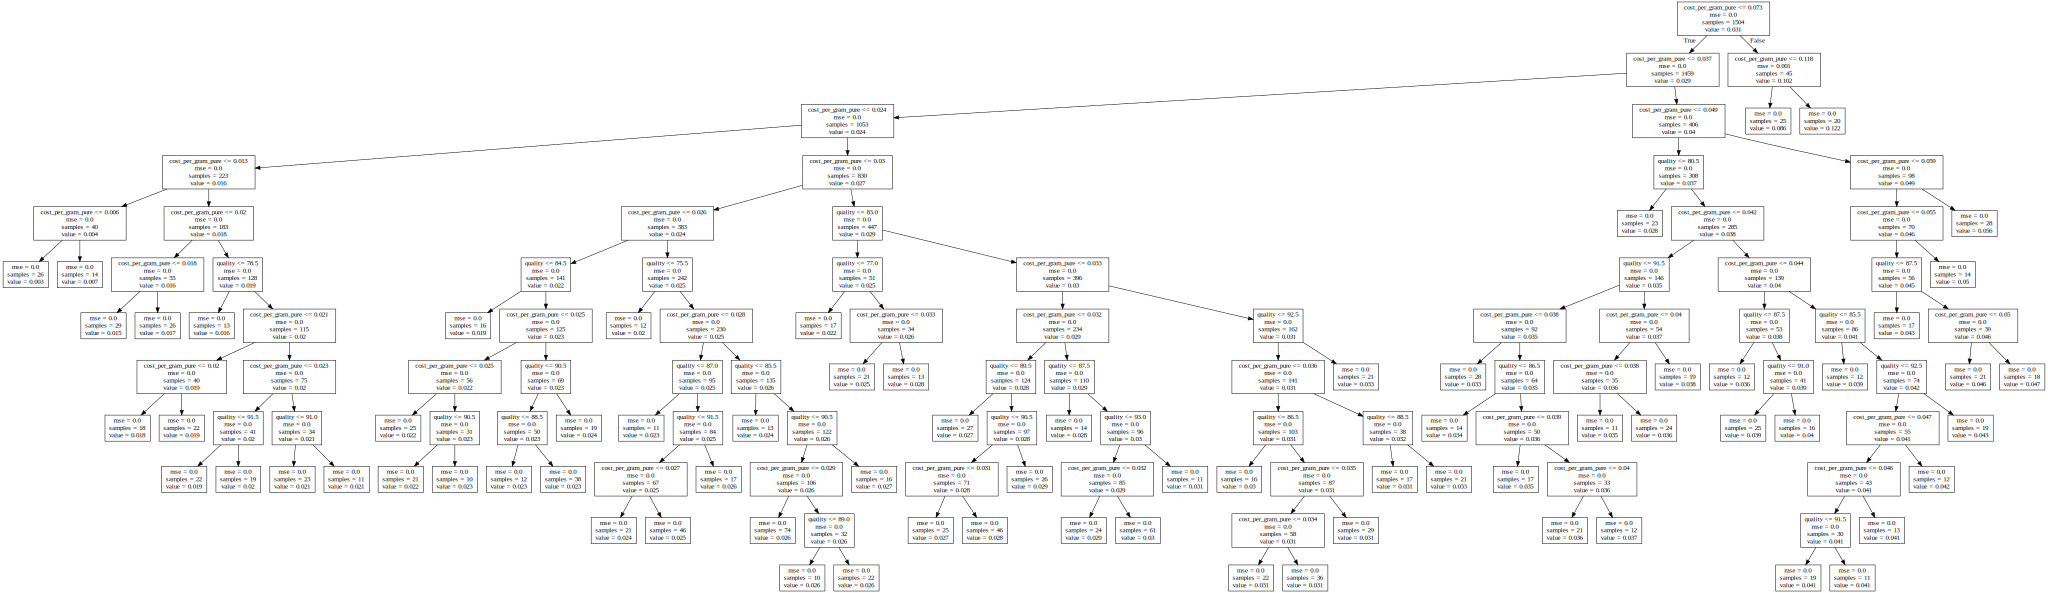

In [80]:
from sklearn.tree import export_graphviz
with open ("img/arbold_coca.dot","w") as dotfile:
    export_graphviz (regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

import os

from graphviz import Source
file= open("img/arbold_coca.dot","r")
text = file.read()
Source(text)

In [81]:
### cross validation 

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import 


In [83]:
k_fold = KFold(n_splits=10,shuffle=True,random_state=1)

In [84]:

print (k_fold)

KFold(n_splits=10, random_state=1, shuffle=True)


In [85]:
scores= cross_val_score (regtree, X1, Y1, scoring ="neg_mean_squared_error",cv=cv, n_jobs=1)
print (scores)
score= np.mean(scores)
print (score)

NameError: name 'cv' is not defined

In [ ]:
list(zip(predictors,regtree.feature_importances_))